In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append("../../")
from utils.dataset import ClassificationDataset
from tf_models.classification import DataGenerator, tiny_VGG_Network

from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

import pandas as pd

Using TensorFlow backend.


# FashionMnist Dataset 학습시키기

## 1) dataset을 가져와서 파이프라인 구성하기

In [2]:
dataset_name = "fashionmnist"

train_dataset = ClassificationDataset(dataset_name, 'train')
train_generator = DataGenerator(train_dataset)

validation_dataset = ClassificationDataset(dataset_name, 'validation')
validation_generator = DataGenerator(validation_dataset)

test_dataset = ClassificationDataset(dataset_name, 'test')
test_generator = DataGenerator(test_dataset)

## 2) Model 구성하기

In [3]:
model = tiny_VGG_Network((28,28,1), 10)

model.compile(Adam(lr=0.001), 
              sparse_categorical_crossentropy, 
              metrics=["acc"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 8)         80        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 28, 28, 8)         584       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 8)         0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 14, 14, 16)        1168      
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 16)        2320      
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 16)          0         
__________

## 3) 학습시키기

In [4]:
hist = model.fit_generator(train_generator,
                           epochs=10,
                           validation_data=validation_generator,
                           validation_steps=None)

Epoch 1/10
1718/1718 [==============================] - 46s 26ms/step - loss: 0.5296 - acc: 0.8027 - val_loss: 0.3920 - val_acc: 0.8648
Epoch 2/10
1718/1718 [==============================] - 46s 27ms/step - loss: 0.3285 - acc: 0.8788 - val_loss: 0.2974 - val_acc: 0.8868
Epoch 3/10
1718/1718 [==============================] - 40s 23ms/step - loss: 0.2872 - acc: 0.8925 - val_loss: 0.2869 - val_acc: 0.8954
Epoch 4/10
1718/1718 [==============================] - 38s 22ms/step - loss: 0.2555 - acc: 0.9052 - val_loss: 0.2905 - val_acc: 0.8922
Epoch 5/10
1718/1718 [==============================] - 46s 27ms/step - loss: 0.2335 - acc: 0.9139 - val_loss: 0.2938 - val_acc: 0.8998
Epoch 6/10
1718/1718 [==============================] - 41s 24ms/step - loss: 0.2138 - acc: 0.9200 - val_loss: 0.2536 - val_acc: 0.9083
Epoch 7/10
1718/1718 [==============================] - 45s 26ms/step - loss: 0.1998 - acc: 0.9258 - val_loss: 0.2602 - val_acc: 0.9095
Epoch 8/10
1718/1718 [==========================

In [5]:
progress_df = pd.DataFrame(hist.history) # 학습 진행과정을 dataframe
progress_df

,val_loss,val_acc,loss,acc
0,0.392013,0.864784,0.529623,0.802659
1,0.297406,0.886819,0.328509,0.878820
2,0.286942,0.895433,0.287157,0.892480
3,0.290487,0.892228,0.255492,0.905159
4,0.293775,0.899840,0.233493,0.913944
5,0.253552,0.908253,0.213815,0.920020
6,0.260207,0.909455,0.199814,0.925768
7,0.264978,0.910256,0.188484,0.929678
8,0.259295,0.911859,0.176726,0.933771
9,0.239541,0.921675,0.165115,0.938209


## 4) 결과 평가하기

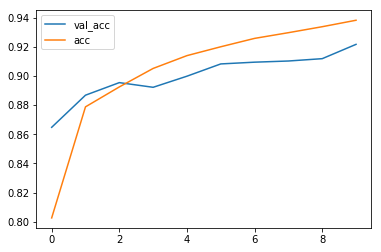

In [6]:
progress_df.plot(y=['val_acc','acc'])

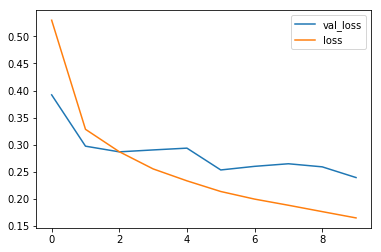

In [7]:
progress_df.plot(y=['val_loss','loss'])

In [8]:
test_loss, test_acc = model.evaluate_generator(test_generator)
print("test loss : {} / test accuract : {}".format(test_loss, test_acc))

test loss : 0.22750983353202733 / test accuract : 0.9212740384615384
